In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [2]:
# importing the file
df=pd.read_csv("SalaryData_Train.csv")
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
#Data Structure 
df.shape

(30161, 14)

In [4]:
#performing EDA on the dataset

# getting the count values for different variables
df['workclass'].value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [5]:
df['education'].value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

In [6]:
df['maritalstatus'].value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

In [7]:
df['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [8]:
df['relationship'].value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      888
Name: relationship, dtype: int64

In [9]:
df['race'].value_counts()

 White                 25932
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

In [10]:
df['native'].value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Columbia                         56
 Poland                           56
 Haiti                            42
 Taiwan                           42
 Iran                             42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [11]:
# copying the data to df1 so that the original data will not get affected
df1=df.copy()

In [24]:
# assigning specific values to string datasets
labelencoder = LabelEncoder()
df1.iloc[:,1] = labelencoder.fit_transform(df1.iloc[:,1])
df1.iloc[:,2] = labelencoder.fit_transform(df1.iloc[:,2])
df1.iloc[:,4] = labelencoder.fit_transform(df1.iloc[:,4])
df1.iloc[:,5] = labelencoder.fit_transform(df1.iloc[:,5])
df1.iloc[:,6] = labelencoder.fit_transform(df1.iloc[:,6])
df1.iloc[:,7] = labelencoder.fit_transform(df1.iloc[:,7])
df1.iloc[:,12] = labelencoder.fit_transform(df1.iloc[:,12])
df1.iloc[:,8] = labelencoder.fit_transform(df1.iloc[:,8])
df1.iloc[:,13] = labelencoder.fit_transform(df1.iloc[:,13])
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,0,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,0,0,0,13,37,0
2,38,2,11,9,0,5,1,4,0,0,0,40,37,0
3,53,2,1,7,2,5,0,2,0,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,0,0,0,20,37,0


Text(0, 0.5, 'hoursperweek')

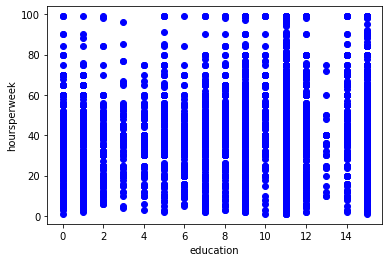

In [17]:
plt.plot(df1.education,df1.hoursperweek,"bo")
plt.xlabel("education")
plt.ylabel("hoursperweek")

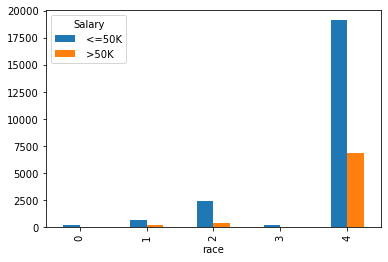

In [18]:
pd.crosstab(df1.race,df1.Salary).plot(kind="bar")

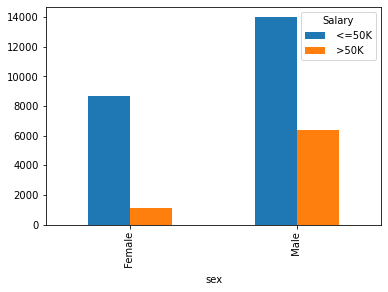

In [19]:
pd.crosstab(df.sex,df1.Salary).plot(kind="bar")

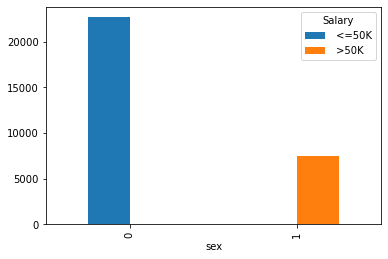

In [20]:
pd.crosstab(df1.sex,df1.Salary).plot(kind="bar")

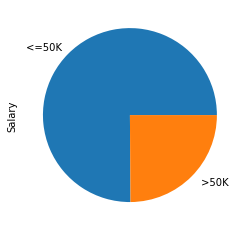

In [26]:
# pie-chart to know the  number of people with salary<=50 & >50
df.Salary.value_counts().plot(kind="pie") 

In [28]:
# defining target and independent variables
X=df1.iloc[:,0:13]
y=df1.iloc[:,13]

In [30]:
# fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
#Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [32]:
clf.score(X_test,y_test)

0.7701426562186056

In [33]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      7466
           1       0.63      0.20      0.30      2488

    accuracy                           0.77      9954
   macro avg       0.70      0.58      0.58      9954
weighted avg       0.74      0.77      0.72      9954

